# Libraries

In [ ]:
from wordcloud import WordCloud

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline
from matplotlib.gridspec import GridSpec

from bs4 import BeautifulSoup

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
import nltk
nltk.download('wordnet')
from nltk.stem import 	WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


# Read data

In [ ]:
stackoverflow = pd.read_csv('/QueryResults1.csv')

In [ ]:
stackoverflow2 = pd.read_csv('/QueryResults2.csv')

In [ ]:
stackoverflow3 = pd.read_csv('/QueryResults3.csv')

In [ ]:
stackoverflow4 = pd.read_csv('/QueryResults4.csv')

In [ ]:
stackoverflow5 = pd.read_csv('/QueryResults5.csv')

In [ ]:
stack = pd.concat([stackoverflow2, stackoverflow3, stackoverflow4, stackoverflow5], axis=0)

# EDA + Cleaning

In [ ]:
stack.head()

,id,AcceptedAnswerId,Score,ViewCount,Body,Title,Tags,AnswerCount,FavoriteCount
0,16594613,16597402.0,91,12521,<p>The last week I read a lot articles about p...,How to hash long passwords (>72 characters) wi...,<php><security><hash><passwords><blowfish>,3,50.0
1,8864,8869.0,85,30721,<p>Is there a difference between <code>NULL</c...,Difference between NULL and null in PHP,<php><null>,3,10.0
2,32968527,32969085.0,88,103439,<p>I tried to upgrade hibernate from 4 to 5 in...,Hibernate-sequence doesn't exist,<java><spring><hibernate>,15,18.0
3,13537,13552.0,97,18118,<p>I've heard of the idea of bootstrapping a l...,Bootstrapping still requires outside support,<compiler-construction><bootstrapping>,11,59.0
4,20047,21158.0,82,28561,"<p>We're seeing some pernicious, but rare, dea...",Diagnosing Deadlocks in SQL Server 2005,<sql-server><sql-server-2005><deadlock>,22,58.0
...,...,...,...,...,...,...,...,...,...
1268,5874652,5876747.0,2349,632427,"<p>So <a href=""http://api.jquery.com/category/...",.prop() vs .attr(),<javascript><jquery><dom><attr><prop>,18,735.0
1269,7131670,7131683.0,1368,582893,"<p>I used to use CShell (<a href=""/questions/t...",Make a Bash alias that takes a parameter?,<bash><alias>,20,311.0
1270,7147270,7147320.0,1107,645639,<p>I currently have three modified files in my...,Hard reset of a single file,<git>,9,255.0
1271,24319662,24326540.0,1751,999800,<p>So I have a Nginx running inside a docker c...,"From inside of a Docker container, how do I co...",<nginx><docker><reverse-proxy><docker-networking>,31,765.0


In [ ]:
stack.describe()

,id,AcceptedAnswerId,Score,ViewCount,AnswerCount,FavoriteCount
count,1.004280e+05,8.686300e+04,100428.000000,1.004280e+05,100428.000000,100395.000000
mean,1.310228e+07,1.374503e+07,156.308460,1.527944e+05,8.612867,47.894736
std,1.322702e+07,1.365817e+07,302.990101,2.386581e+05,7.698627,130.615805
min,4.000000e+00,7.000000e+00,51.000000,5.660000e+02,0.000000,0.000000
25%,2.771549e+06,3.018452e+06,64.000000,4.553675e+04,4.000000,14.000000
50%,8.284506e+06,8.902918e+06,88.000000,8.767700e+04,7.000000,25.000000
75%,1.952858e+07,2.043608e+07,148.000000,1.712448e+05,11.000000,46.000000
max,6.530330e+07,6.493439e+07,25113.000000,9.137293e+06,518.000000,11205.000000


In [ ]:
stack = stack.reset_index().drop('index', axis=1)

In [ ]:
def parse_html(html):
  soup = BeautifulSoup(html, features="html.parser")

  # kill all script and style elements
  for script in soup(["script", "style"]):
      script.extract()    # rip it out

  # get text
  text = soup.get_text()

  # break into lines and remove leading and trailing space on each
  lines = (line.strip() for line in text.splitlines())
  # break multi-headlines into a line each
  chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
  # drop blank lines
  text = '\n'.join(chunk for chunk in chunks if chunk)

  return text

In [ ]:
stack['Body_c'] = stack['Body'].apply(parse_html)

In [ ]:
stack['Tags_c'] = stack['Tags'].str.replace('>', ' ').str.replace('<','').str.strip()

In [ ]:
stack.head()

,id,AcceptedAnswerId,Score,ViewCount,Body,Title,Tags,AnswerCount,FavoriteCount,Body_c,Tags_c
0,16594613,16597402.0,91,12521,<p>The last week I read a lot articles about p...,How to hash long passwords (>72 characters) wi...,<php><security><hash><passwords><blowfish>,3,50.0,The last week I read a lot articles about pass...,php security hash passwords blowfish
1,8864,8869.0,85,30721,<p>Is there a difference between <code>NULL</c...,Difference between NULL and null in PHP,<php><null>,3,10.0,Is there a difference between NULL and null in...,php null
2,32968527,32969085.0,88,103439,<p>I tried to upgrade hibernate from 4 to 5 in...,Hibernate-sequence doesn't exist,<java><spring><hibernate>,15,18.0,I tried to upgrade hibernate from 4 to 5 in my...,java spring hibernate
3,13537,13552.0,97,18118,<p>I've heard of the idea of bootstrapping a l...,Bootstrapping still requires outside support,<compiler-construction><bootstrapping>,11,59.0,I've heard of the idea of bootstrapping a lang...,compiler-construction bootstrapping
4,20047,21158.0,82,28561,"<p>We're seeing some pernicious, but rare, dea...",Diagnosing Deadlocks in SQL Server 2005,<sql-server><sql-server-2005><deadlock>,22,58.0,"We're seeing some pernicious, but rare, deadlo...",sql-server sql-server-2005 deadlock


Count number of tags for each question

In [ ]:
stack['Tags_count'] = stack['Tags_c'].apply(lambda x: len(x.split()))

In [ ]:
stack.head()

,id,AcceptedAnswerId,Score,ViewCount,Body,Title,Tags,AnswerCount,FavoriteCount,Body_c,Tags_c,Tags_count
0,16594613,16597402.0,91,12521,<p>The last week I read a lot articles about p...,How to hash long passwords (>72 characters) wi...,<php><security><hash><passwords><blowfish>,3,50.0,The last week I read a lot articles about pass...,php security hash passwords blowfish,5
1,8864,8869.0,85,30721,<p>Is there a difference between <code>NULL</c...,Difference between NULL and null in PHP,<php><null>,3,10.0,Is there a difference between NULL and null in...,php null,2
2,32968527,32969085.0,88,103439,<p>I tried to upgrade hibernate from 4 to 5 in...,Hibernate-sequence doesn't exist,<java><spring><hibernate>,15,18.0,I tried to upgrade hibernate from 4 to 5 in my...,java spring hibernate,3
3,13537,13552.0,97,18118,<p>I've heard of the idea of bootstrapping a l...,Bootstrapping still requires outside support,<compiler-construction><bootstrapping>,11,59.0,I've heard of the idea of bootstrapping a lang...,compiler-construction bootstrapping,2
4,20047,21158.0,82,28561,"<p>We're seeing some pernicious, but rare, dea...",Diagnosing Deadlocks in SQL Server 2005,<sql-server><sql-server-2005><deadlock>,22,58.0,"We're seeing some pernicious, but rare, deadlo...",sql-server sql-server-2005 deadlock,3


Count the number of characters in body and title

In [ ]:
stack['Body_length'] = stack['Body_c'].apply(lambda x: len(''.join(x.split())))
stack['Title_length'] = stack['Title'].apply(lambda x: len(''.join(x.split())))

In [ ]:
stack.head()

,id,AcceptedAnswerId,Score,ViewCount,Body,Title,Tags,AnswerCount,FavoriteCount,Body_c,Tags_c,Tags_count,Body_length,Title_length
0,16594613,16597402.0,91,12521,<p>The last week I read a lot articles about p...,How to hash long passwords (>72 characters) wi...,<php><security><hash><passwords><blowfish>,3,50.0,The last week I read a lot articles about pass...,php security hash passwords blowfish,5,2607,49
1,8864,8869.0,85,30721,<p>Is there a difference between <code>NULL</c...,Difference between NULL and null in PHP,<php><null>,3,10.0,Is there a difference between NULL and null in...,php null,2,292,33
2,32968527,32969085.0,88,103439,<p>I tried to upgrade hibernate from 4 to 5 in...,Hibernate-sequence doesn't exist,<java><spring><hibernate>,15,18.0,I tried to upgrade hibernate from 4 to 5 in my...,java spring hibernate,3,412,30
3,13537,13552.0,97,18118,<p>I've heard of the idea of bootstrapping a l...,Bootstrapping still requires outside support,<compiler-construction><bootstrapping>,11,59.0,I've heard of the idea of bootstrapping a lang...,compiler-construction bootstrapping,2,478,40
4,20047,21158.0,82,28561,"<p>We're seeing some pernicious, but rare, dea...",Diagnosing Deadlocks in SQL Server 2005,<sql-server><sql-server-2005><deadlock>,22,58.0,"We're seeing some pernicious, but rare, deadlo...",sql-server sql-server-2005 deadlock,3,2893,34


In [ ]:
stack.describe()

,id,AcceptedAnswerId,Score,ViewCount,AnswerCount,FavoriteCount,Tags_count,Body_length,Title_length
count,1.004280e+05,8.686300e+04,100428.000000,1.004280e+05,100428.000000,100395.000000,100428.000000,100428.000000,100428.000000
mean,1.310228e+07,1.374503e+07,156.308460,1.527944e+05,8.612867,47.894736,3.010425,592.446828,43.251205
std,1.322702e+07,1.365817e+07,302.990101,2.386581e+05,7.698627,130.615805,1.181280,891.826288,15.911775
min,4.000000e+00,7.000000e+00,51.000000,5.660000e+02,0.000000,0.000000,1.000000,12.000000,8.000000
25%,2.771549e+06,3.018452e+06,64.000000,4.553675e+04,4.000000,14.000000,2.000000,209.000000,32.000000
50%,8.284506e+06,8.902918e+06,88.000000,8.767700e+04,7.000000,25.000000,3.000000,371.000000,41.000000
75%,1.952858e+07,2.043608e+07,148.000000,1.712448e+05,11.000000,46.000000,4.000000,665.000000,52.000000
max,6.530330e+07,6.493439e+07,25113.000000,9.137293e+06,518.000000,11205.000000,5.000000,28642.000000,140.000000


## Visualize the data

**Body length distribution**

Text(0.5, 1.0, 'Body length distribution')

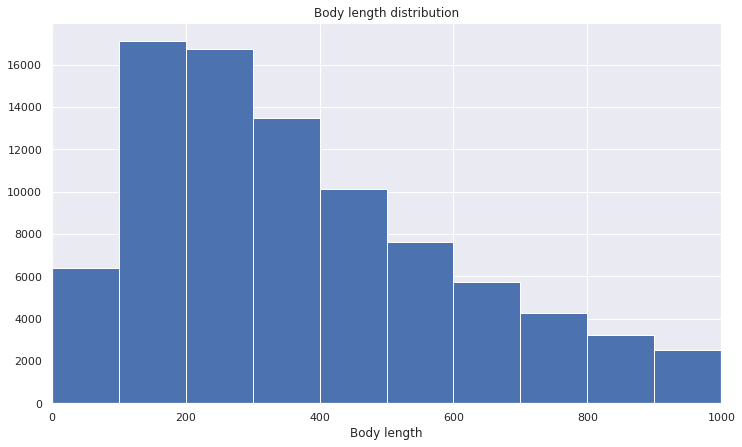

In [ ]:
plt.figure(figsize=(12,7))
plt.hist(stack['Body_length'], bins=[i for i in range(0,30000,100)])
plt.xlim(0,1000)
plt.xlabel('Body length')
plt.title('Body length distribution')

**Title length distribution**

Text(0.5, 1.0, 'Title length distribution')

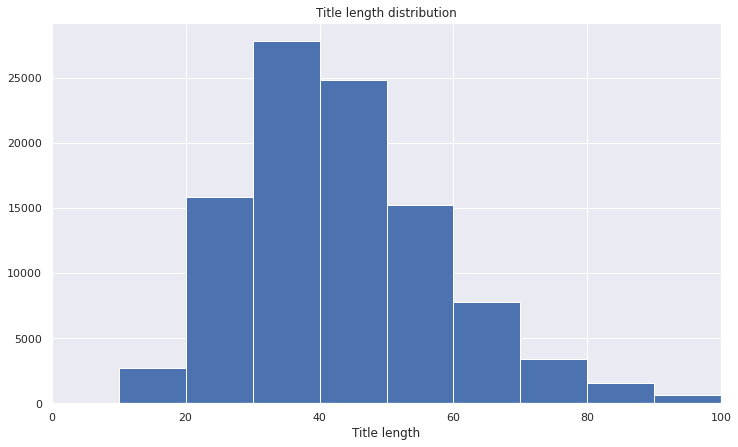

In [ ]:
plt.figure(figsize=(12,7))
plt.hist(stack['Title_length'], bins=[i for i in range(0,140,10)])
plt.xlim(0,100)
plt.xlabel('Title length')
plt.title('Title length distribution')

**Number of tags distribution**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


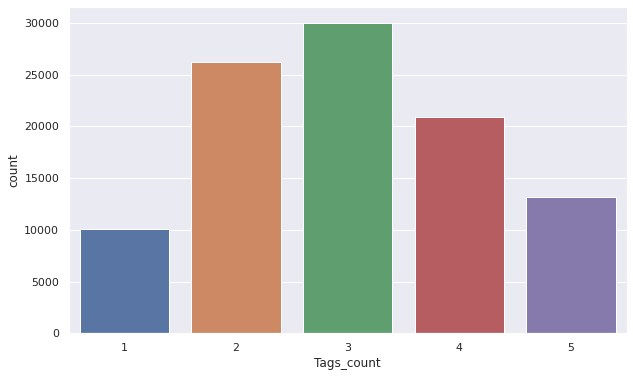

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(stack['Tags_count'])

From the countplot above we can say that:
  - number of tags is comprised between 1 and 5
  - 3 tags questions are the most represented within this dataset

**Tags count vs body length**

Text(0, 0.5, 'body length')

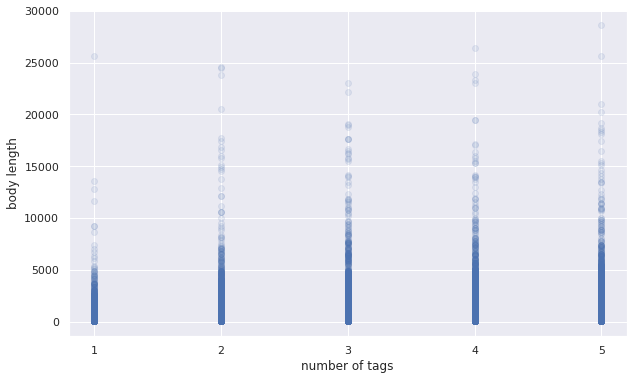

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=stack['Tags_count'], y=stack['Body_length'], alpha=0.1)
plt.xticks([1,2,3,4,5])
plt.xlabel('number of tags')
plt.ylabel('body length')

There is no clear relation between the number of tags and the length of the body.

## Tags

In [ ]:
tags_no_lemma=['ios', 'css', 'windows', 'https', 'iis', 'pandas']

In [ ]:
def clean_tag(text):
 
  text = text.replace('>', ' ').replace('<','')

  # convert to lowercase
  text = text.lower()

  # remove contractions
  rep_word = REReplacer()
  text = rep_word.replace(text)
  
  # split into words
  tokens = word_tokenize(text)

  # remove punctuation from each word
  table = str.maketrans('', '', string.punctuation)
  stripped = [w.translate(table) for w in tokens]

  # remove remaining tokens that are not alphabetic
  words = [word for word in stripped if word.isalpha()]

  # filter out stop words
  stop_words = set(stopwords.words('english'))
  words = [w for w in words if not w in stop_words]

  # lemmatization except tags
  wordnet_lemmatizer = WordNetLemmatizer()
  words_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in words if w not in tags_no_lemma]

  # filter non lemmatized words that are in tags_no_lemma
  words_tag = [w for w in words if w in tags_no_lemma]

  words = words_lemma + words_tag
  return words

In [ ]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [ ]:
R_patterns = [
   (r'won\'t', 'will not'),
   (r'can\'t', 'cannot'),
   (r'[Ii]\'m', 'i am'),
   (r'(\w+)\'ll', '\g<1> will'),
   (r'(\w+)n\'t', '\g<1> not'),
   (r'(\w+)\'ve', '\g<1> have'),
   (r'(\w+)\'s', '\g<1> is'),
   (r'(\w+)\'re', '\g<1> are'),
]

class REReplacer(object):
   def __init__(self, pattern = R_patterns):
      self.pattern = [(re.compile(regex), repl) for (regex, repl) in pattern]
   def replace(self, text):
      s = text
      for (pattern, repl) in self.pattern:
         s = re.sub(pattern, repl, s)
      return s



In [ ]:
stack['Tags_cleaned'] = stack['Tags'].apply(clean_tag)

Count the occurence of each tag.

In [ ]:
tags = {}
for i in range(len(stack)):
  for j in range(len(stack['Tags_cleaned'][i])):
    if stack['Tags_cleaned'][i][j] in tags.keys():
      tags[stack['Tags_cleaned'][i][j]] += 1
    else:
      tags[stack['Tags_cleaned'][i][j]] = 1

**Save most frequent tags in a dictionary (>100 appearance)**

In [ ]:
best_tags = {}
for k,v in tags.items():
  if tags[k] >= 100:
    best_tags[k] = v
  else:
    continue

In [ ]:
len(best_tags)

402

There are 402 tags in the dataset that appears more than 100 times.

In [ ]:
# pd.Series(list(best_tags.keys())).to_csv('/content/drive/My Drive/OpenClassrooms/PStackOverfow_fatmi_amine/top_305_tags')

**Sort the tags in ascending order with respect to their occurence.**

In [ ]:
tags_sorted = {k: v for k, v in sorted(tags.items(), key=lambda item: item[1])}
list(tags_sorted.items())[-10:]

[('git', 3241),
 ('jquery', 3396),
 ('css', 3401),
 ('ios', 3424),
 ('html', 4151),
 ('android', 6859),
 ('java', 9042),
 ('python', 9582),
 ('javascript', 9774),
 ('c', 14204)]

**Top 20 tags:**

Text(0.5, 1.0, 'Top 20 tags')

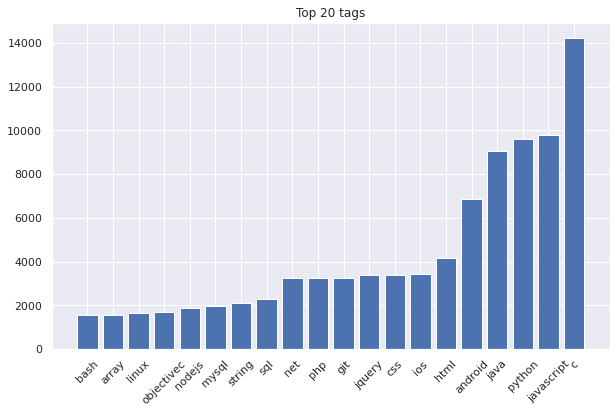

In [ ]:
plt.figure(figsize=(10, 6)) 
plt.bar(dict(list(tags_sorted.items())[-20:]).keys(), dict(list(tags_sorted.items())[-20:]).values())
plt.xticks(rotation=45)
plt.title('Top 20 tags')

In [ ]:
stack['Tags_cleaned']

0               [php, security, hash, password, blowfish]
1                                             [php, null]
2                               [java, spring, hibernate]
3                   [compilerconstruction, bootstrapping]
4                                   [sqlserver, deadlock]
                               ...                       
100423              [javascript, jquery, dom, attr, prop]
100424                                      [bash, alias]
100425                                              [git]
100426    [nginx, docker, reverseproxy, dockernetworking]
100427                        [java, macos, installation]
Name: Tags_cleaned, Length: 100428, dtype: object

In [ ]:
text = stack['Tags_cleaned'].apply(lambda x: ' '.join(x))
text = ' '.join(t for t in text)
text

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", regexp=r"(?u)\b\w+\b").generate(text)
# regex expression modified to include single letter words sucs as 'c' or 'r'

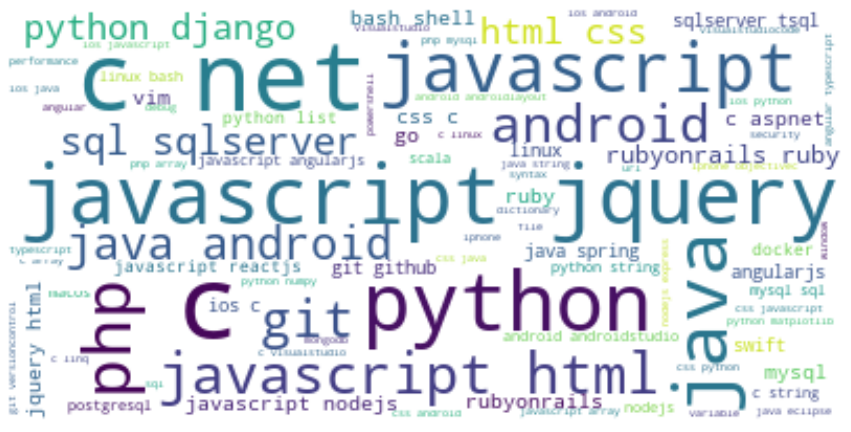

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# save the top 402 tags in a list
top_402_tags = list(best_tags.keys())
# top_402_tags

## Body + Title

In [ ]:
def clean_body_title(text):
  # parse html
  soup = BeautifulSoup(text, features="html.parser")

  # kill all script and style elements
  for script in soup(["script", "style"]):
      script.extract()    # rip it out

  # get text
  text = soup.get_text()

  # remove url
  text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

  # convert to lowercase
  text = text.lower()

  # remove contractions
  rep_word = REReplacer()
  text = rep_word.replace(text)
  
  # split into words
  tokens = word_tokenize(text)

  # remove punctuation from each word
  table = str.maketrans('', '', string.punctuation)
  stripped = [w.translate(table) for w in tokens]

  # remove remaining tokens that are not alphabetic
  words = [word for word in stripped if word.isalpha()]

  # filter out stop words
  stop_words = set(stopwords.words('english'))
  words = [w for w in words if not w in stop_words]

  # lemmatization except tags
  wordnet_lemmatizer = WordNetLemmatizer()
  words_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in words if w not in tags_no_lemma]

  # filter non lemmatized words that are in tags_no_lemma
  words_tag = [w for w in words if w in tags_no_lemma]

  words = words_lemma + words_tag
  return words

**Clean body and title using the text processing techniques stated above.**

In [ ]:
stack['Body_cleaned'] = stack['Body'].apply(clean_body_title)

In [ ]:
stack['Title_cleaned'] = stack['Title'].apply(clean_body_title)

In [ ]:
stack.head()

,id,AcceptedAnswerId,Score,ViewCount,Body,Title,Tags,AnswerCount,FavoriteCount,Body_c,Tags_c,Tags_count,Body_length,Title_length,Tags_cleaned,Body_cleaned,Title_cleaned
0,16594613,16597402.0,91,12521,<p>The last week I read a lot articles about p...,How to hash long passwords (>72 characters) wi...,<php><security><hash><passwords><blowfish>,3,50.0,The last week I read a lot articles about pass...,php security hash passwords blowfish,5,2607,49,"[php, security, hash, password, blowfish]","[last, week, read, lot, article, password, has...","[hash, long, password, character, blowfish]"
1,8864,8869.0,85,30721,<p>Is there a difference between <code>NULL</c...,Difference between NULL and null in PHP,<php><null>,3,10.0,Is there a difference between NULL and null in...,php null,2,292,33,"[php, null]","[difference, null, null, php, sometimes, seem,...","[difference, null, null, php]"
2,32968527,32969085.0,88,103439,<p>I tried to upgrade hibernate from 4 to 5 in...,Hibernate-sequence doesn't exist,<java><spring><hibernate>,15,18.0,I tried to upgrade hibernate from 4 to 5 in my...,java spring hibernate,3,412,30,"[java, spring, hibernate]","[try, upgrade, hibernate, project, spring, ver...","[hibernatesequence, exist]"
3,13537,13552.0,97,18118,<p>I've heard of the idea of bootstrapping a l...,Bootstrapping still requires outside support,<compiler-construction><bootstrapping>,11,59.0,I've heard of the idea of bootstrapping a lang...,compiler-construction bootstrapping,2,478,40,"[compilerconstruction, bootstrapping]","[heard, idea, bootstrapping, language, write, ...","[bootstrapping, still, require, outside, support]"
4,20047,21158.0,82,28561,"<p>We're seeing some pernicious, but rare, dea...",Diagnosing Deadlocks in SQL Server 2005,<sql-server><sql-server-2005><deadlock>,22,58.0,"We're seeing some pernicious, but rare, deadlo...",sql-server sql-server-2005 deadlock,3,2893,34,"[sqlserver, deadlock]","[see, pernicious, rare, deadlock, condition, s...","[diagnose, deadlock, sql, server]"


In [ ]:
body = {}
for i in range(len(stack)):
  for j in range(len(stack['Body_cleaned'][i])):
    if stack['Body_cleaned'][i][j] in body.keys():
      body[stack['Body_cleaned'][i][j]] += 1
    else:
      body[stack['Body_cleaned'][i][j]] = 1

In [ ]:
title = {}
for i in range(len(stack)):
  for j in range(len(stack['Title_cleaned'][i])):
    if stack['Title_cleaned'][i][j] in title.keys():
      title[stack['Title_cleaned'][i][j]] += 1
    else:
      title[stack['Title_cleaned'][i][j]] = 1

**Count number of unique words in title, body and tags.**

In [ ]:
len(title), len(body), len(tags)

(24650, 263748, 12677)

In [ ]:
title_sorted = {k: v for k, v in sorted(title.items(), key=lambda item: item[1])}

Text(0.5, 1.0, 'Top 20 words in Title')

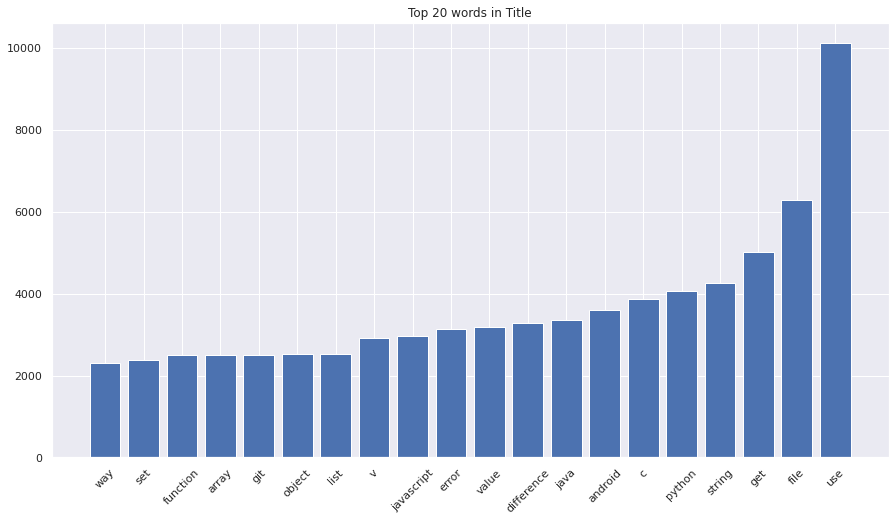

In [ ]:
plt.figure(figsize=(15, 8)) 
plt.bar(dict(list(title_sorted.items())[-20:]).keys(), dict(list(title_sorted.items())[-20:]).values())
plt.xticks(rotation=45)
plt.title('Top 20 words in Title')

In [ ]:
body_sorted = {k: v for k, v in sorted(body.items(), key=lambda item: item[1])}
list(body_sorted.items())[-20:]

[('one', 23741),
 ('android', 25042),
 ('value', 25388),
 ('name', 26045),
 ('return', 27037),
 ('would', 28133),
 ('function', 28523),
 ('way', 29516),
 ('new', 30234),
 ('string', 31427),
 ('want', 31879),
 ('work', 31941),
 ('error', 32192),
 ('code', 33093),
 ('try', 34219),
 ('class', 34378),
 ('like', 41053),
 ('file', 42555),
 ('get', 44371),
 ('use', 82239)]

Text(0.5, 1.0, 'Top 20 words in Body')

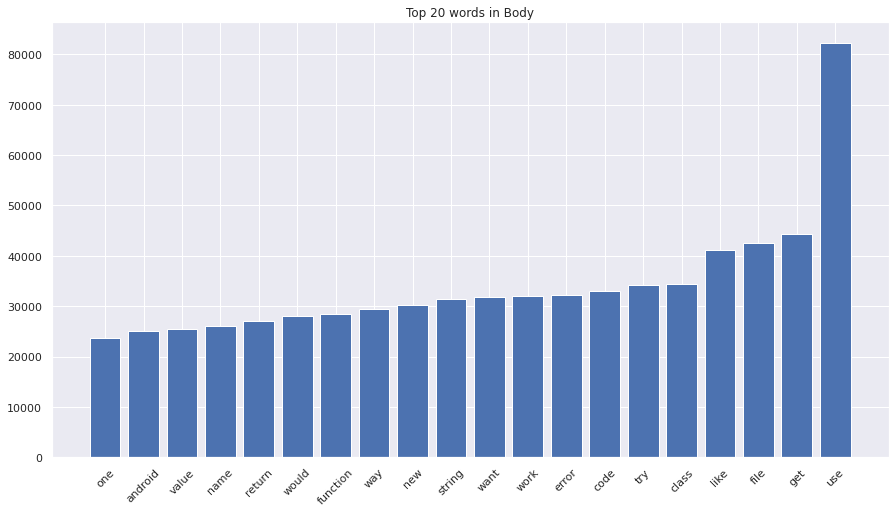

In [ ]:
plt.figure(figsize=(15, 8)) 
plt.bar(dict(list(body_sorted.items())[-20:]).keys(), dict(list(body_sorted.items())[-20:]).values())
plt.xticks(rotation=45)
plt.title('Top 20 words in Body')

In [ ]:
stack

,id,AcceptedAnswerId,Score,ViewCount,Body,Title,Tags,AnswerCount,FavoriteCount,Body_c,Tags_c,Tags_count,Body_length,Title_length,Tags_cleaned,Body_cleaned,Title_cleaned
0,16594613,16597402.0,91,12521,<p>The last week I read a lot articles about p...,How to hash long passwords (>72 characters) wi...,<php><security><hash><passwords><blowfish>,3,50.0,The last week I read a lot articles about pass...,php security hash passwords blowfish,5,2607,49,"[php, security, hash, password, blowfish]","[last, week, read, lot, article, password, has...","[hash, long, password, character, blowfish]"
1,8864,8869.0,85,30721,<p>Is there a difference between <code>NULL</c...,Difference between NULL and null in PHP,<php><null>,3,10.0,Is there a difference between NULL and null in...,php null,2,292,33,"[php, null]","[difference, null, null, php, sometimes, seem,...","[difference, null, null, php]"
2,32968527,32969085.0,88,103439,<p>I tried to upgrade hibernate from 4 to 5 in...,Hibernate-sequence doesn't exist,<java><spring><hibernate>,15,18.0,I tried to upgrade hibernate from 4 to 5 in my...,java spring hibernate,3,412,30,"[java, spring, hibernate]","[try, upgrade, hibernate, project, spring, ver...","[hibernatesequence, exist]"
3,13537,13552.0,97,18118,<p>I've heard of the idea of bootstrapping a l...,Bootstrapping still requires outside support,<compiler-construction><bootstrapping>,11,59.0,I've heard of the idea of bootstrapping a lang...,compiler-construction bootstrapping,2,478,40,"[compilerconstruction, bootstrapping]","[heard, idea, bootstrapping, language, write, ...","[bootstrapping, still, require, outside, support]"
4,20047,21158.0,82,28561,"<p>We're seeing some pernicious, but rare, dea...",Diagnosing Deadlocks in SQL Server 2005,<sql-server><sql-server-2005><deadlock>,22,58.0,"We're seeing some pernicious, but rare, deadlo...",sql-server sql-server-2005 deadlock,3,2893,34,"[sqlserver, deadlock]","[see, pernicious, rare, deadlock, condition, s...","[diagnose, deadlock, sql, server]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100423,5874652,5876747.0,2349,632427,"<p>So <a href=""http://api.jquery.com/category/...",.prop() vs .attr(),<javascript><jquery><dom><attr><prop>,18,735.0,So jQuery 1.6 has the new function prop().\n$(...,javascript jquery dom attr prop,5,831,16,"[javascript, jquery, dom, attr, prop]","[jquery, new, function, prop, selector, click,...","[prop, v, attr]"
100424,7131670,7131683.0,1368,582893,"<p>I used to use CShell (<a href=""/questions/t...",Make a Bash alias that takes a parameter?,<bash><alias>,20,311.0,"I used to use CShell (csh), which lets you mak...",bash alias,2,250,34,"[bash, alias]","[use, use, cshell, csh, let, make, alias, take...","[make, bash, alias, take, parameter]"
100425,7147270,7147320.0,1107,645639,<p>I currently have three modified files in my...,Hard reset of a single file,<git>,9,255.0,I currently have three modified files in my wo...,git,1,330,22,[git],"[currently, three, modify, file, work, directo...","[hard, reset, single, file]"
100426,24319662,24326540.0,1751,999800,<p>So I have a Nginx running inside a docker c...,"From inside of a Docker container, how do I co...",<nginx><docker><reverse-proxy><docker-networking>,31,765.0,So I have a Nginx running inside a docker cont...,nginx docker reverse-proxy docker-networking,4,822,69,"[nginx, docker, reverseproxy, dockernetworking]","[nginx, run, inside, docker, container, mysql,...","[inside, docker, container, connect, localhost..."


Concatenate body and title

In [ ]:
stack['Body_title_cleaned'] = stack['Body_cleaned'] + stack['Title_cleaned']

Count in how many documents each word appears

In [ ]:
count={}
for i in range(len(stack)):
  for w in set(stack['Body_title_cleaned'][i]):
    if w in count:
      count[w]+=1
    else:
      count[w]=1

In [ ]:
count['last']

3112

In [ ]:
title_body_count = {k: v for k, v in sorted(count.items(), key=lambda item: item[1])}
list(title_body_count.items())[-40:]

[('problem', 10451),
 ('type', 10512),
 ('question', 10730),
 ('also', 10795),
 ('could', 11120),
 ('method', 11162),
 ('add', 11234),
 ('seem', 11299),
 ('c', 11445),
 ('name', 11507),
 ('look', 11551),
 ('find', 11743),
 ('see', 11831),
 ('set', 12148),
 ('run', 12388),
 ('something', 12545),
 ('value', 12703),
 ('create', 12927),
 ('string', 13002),
 ('function', 13088),
 ('class', 13308),
 ('return', 13531),
 ('make', 14220),
 ('example', 14439),
 ('error', 15225),
 ('follow', 15822),
 ('know', 16040),
 ('new', 16357),
 ('need', 16597),
 ('one', 17779),
 ('file', 18090),
 ('would', 20250),
 ('code', 21808),
 ('work', 22782),
 ('way', 24033),
 ('want', 24069),
 ('try', 24659),
 ('like', 29347),
 ('get', 30137),
 ('use', 48616)]

Use appears in 48% of the documents. Most of the words are generic apart from 'C'. We can specify max_df = 15% to get rid off words that appears in more than 15% of the documents.

# Export the cleaned data

Save the dataframe into a csv file.

In [ ]:
pd.Series(top_402_tags).to_csv('/top_402_tags.csv')

In [ ]:
stack.to_csv('/stack_cleaned.csv')